# <font color='brown'><center> Multiple Linear Regression

## <font color='blue'> Motivation - When One Variable Is Not Enough

The term `multiple` in multiple linear regression is self-explanatory; it represents the relationship between two or more independent input variables and a response variable. Multiple linear regression is needed when one variable is not sufficient to create a good model and make accurate predictions.

**Recall advertising dataset**

In [3]:
import pandas as pd 
advertising = pd.read_csv(r"C:\My files\Upgrad Data science\1. Main Course\5. Machine learning 1\1. Linear Regression\2. Simple Linear Regression in Python\advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


It has four columns are `TV, Radio, Newspaper & Sales`

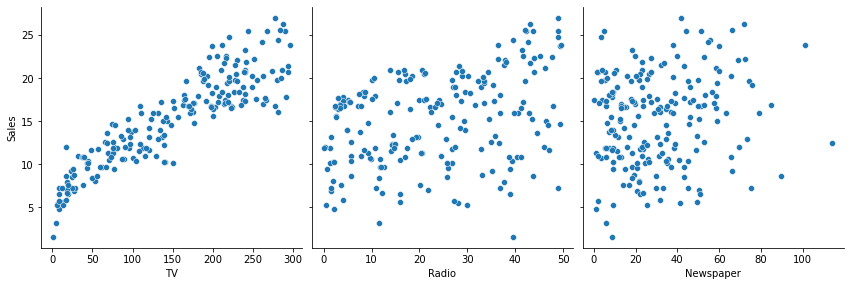

In [7]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.pairplot(advertising,x_vars=["TV", "Radio", "Newspaper"],y_vars="Sales",diag_kind=None,size=4,aspect=1);

we noticed that `TV` has high positive correlation with `Sales`, 

what if we add another variable to `TV`, the $R^2$ value will change? 

|Predictors|R squared|
|:--|:--|
|TV|0.816|
|Radio|0.112|
|Newspaper|0.058|
|TV + Newspaper|0.836|
|TV + Radio|0.910|

Refer the above table the $R^2$ value getting increased if we add another variable with `TV`

`TV + Radio` is explaning 91% of the variance in `sales`

### <font color='blue'>MCQ's

#### <font color = 'blue'>Question_1:
**R-Squared**<br><br>
In the simple linear regression model between TV and sales, the accuracy, or the 'model fit', as measured by the R-squared was about 0.81. But when you brought in the radio and the newspaper variables along with TV, the R-squared increased to 0.91 and 0.83, respectively. Do you think the R-squared value will always increase (or at least remain the same) when you add more variables?.

- Yes
- No
- Cannot say

    

#### <font color = 'blue'>Answer:
**Yes** 
    
The R-squared value will always either increase or remain the same when you add more variables. This is because you already have the predictive power of the previous variable; so, the R-squared value can definitely not go down. And a new variable, no matter how insignificant it might be, cannot decrease the value of the R-squared.
    
---

## <font color='blue'> Formulation of MLR(Multiple Linear Regression)
    
Extension of Simple Linear Regression to 'adds' more factors/effects
    
$$Y=\beta_{0}+\beta_{1}X_{1}+\beta_{2}X_{2}+...+\beta_{p}X_{p}+\epsilon$$
    

**Interpretation of the coefficients:**<br>
Change in the mean response, E(y), per unit increase in the variable when other predictors are held constant 
    
<br>

**A lot of ideas are the same as or are simple extensions to SLR:**
- Model now fits a `hyperplane` instead of line 
- Coefficients still obtained by minimizing sum of squared error (Least square criterion)
- For inference, the assumptions from Simple Linear Regression still hold
    - Zero mean, independent, Normally distributed error terms that have constant variance
    
   
<br>
<br>

**Multiple Linear Regression model Hyperplane fit**
<div>
<img src="https://aegis4048.github.io/images/featured_images/multiple_linear_regression_and_visualization.png" width='1000'>
</div>


### <font color='blue'>MCQ's

#### <font color = 'blue'>Question_1:
**Assumptions of Multiple Linear Regression**<br><br>
Which of the following assumptions changes for multiple linear regression?

- The error terms should be normally distributed.
- The error terms are centred on zero.
- None of the above.

    

#### <font color = 'blue'>Answer:
**None of the above.** 
    
Correct! None of the assumptions above changes when moving from simple to multiple linear regression.
    
---

## <font color='blue'> Moving from SLR to MLR - New Considerations
    
**New considerations:**
    
1. Adding more isn't always helpful
    1. Model may **`Overfit`** by becoming too complex
        1. Model fits the train set `too well`, doesn't generlize
        2. Symptoms: high trian accuracy, low test accuracy
    2. Multicollinearity
        1. Associations between predictor variables

    
2. Feature selection becomes an important aspect
    1. Selecting an optimal set from a pool of given features, many of which might be redundant, becomes an important task.
 
<div>
<img src="http://4.bp.blogspot.com/-6Rcdu0lWFGw/U2TuLyAJC4I/AAAAAAAAEoI/hUmT2S8y2Lo/s1600/model_fit~terms.png" width='400'>
</div>
    
Refer the above figure for **`Overfit`**, if you see higher the polinomial degree the line passes through almost all the data point it may result in to low predicting power

### <font color='blue'>MCQ's

#### <font color = 'blue'>Question_1:
**Overfitting**<br><br>
Which of these two models would be a better fit to the data?

<div>
<img src="https://images.upgrad.com/8fef9956-17b8-49a4-9211-09a3ba25d813-2.PNG" width='300'>
</div>
    

<div>
<img src="https://images.upgrad.com/39d96707-66cd-47a6-98c7-e79148a94327-3.PNG" width='300'>
</div>

- The first one
- The second one
- Both are similar

    

#### <font color = 'blue'>Answer:
**The first one** 
    
Correct! The first model seems to be generalising well on the data set. So, if more such similar data is introduced, the accuracy will not drop. But the second model clearly seems to have memorised all the datapoints in the data set and is, hence, displaying overfitting, which might not be good if new datapoints are introduced.
    
---

## <font color='blue'> Multicollinearity

**Thought experiment:** Predictors $X_{1}$,$X_{2}$ are exactly the same. Is there a difference in the effects of the following?<br><br>
A) $2X_{1} + 8X_{2}$<br>
B) $10X_{1}$<br>
C) $10X_{2}$<br>
D) $9X_{1} + 1X_{2}$<br>

If the output value affects we can not able to find which predictor is affecting the output.

This is, in essence, why having related predictors(a.k.a multicolinearity) is an issue.

**Multicollinearity affects:**<br>
- Interpretation: does `change in Y,when all others are held constant` apply?
- Inference:
    - coefficients swing wildly, signs can invert
    - p values therefore not reliable
    

**Multicollinearity does not affect:**
- the predictions, precision of the predictions
- goodness-of-fit statistics

### <font color='blue'> Detecting multicollinearity: correlations
    
**Detecting multicollinearity = Detecting associations in predictors**
- Scatter plots to visually inspect
- Correlations to quantify the linear association (heat map)
    
**Idea:**Build a model to explain the **predictor** using **other predictors**.
    
**Variance Inflation Factor:** 
    
$$VIF_{i} = \frac{1}{1-R_{i}^2}$$
    
If $VIF$ is high, then the predictor variable is having high correlation with other predictor variables
    
**Common heuristic:** While >10 is definitely high;>5 shoudn't be ignored
    
    
**Quiz**:Can VIF for a variable change if you drop one of the other predictor variables?
    
**Answer**: **`Yes`** VIF can change if you dropped a variable

### <font color='blue'> Dealing multicollinearity
    
Dropping variables
- Drop the variable that is highly correlated with others
- Pick the business interpretable variable (if interpretation and explicability important)
    

Create new variable using the interactions of the older variables
- Add interaction feature, drop original features
- Variable transformations:
    - PCA - Principal component analysis (later module)
    - PLS - Partial Least Squares (out of scope)

### <font color='blue'> MCQ's

#### <font color = 'blue'>Question_1:
**Effects of Multicollinearity**<br><br>
Which of the following is not affected by multicollinearity, i.e., if you add more variables that turn out to be dependent on the variables already included?

- p-values
- Coefficients
- The R-squared value

    

#### <font color = 'blue'>Answer:
**The R-squared value** 
    
The predictive power given by the R-squared value is not affected because even though you might have redundant variables in your model, they would play no role in affecting the R-squared. Now, suppose that you have two variables, X1 and X2, which are exactly the same. Using any of the following, say, 10X1 or (4X1 + 6X2) will give you the same result. In the second case, even though you have increased one variable, the predictive power remains the same.

#### <font color = 'blue'>Question_2:
**VIF**<br><br>
VIF is a measure of ___.

- How well a predictor variable is correlated with all the other variables, including the target variable
- How well a predictor variable is correlated with all the other variables, excluding the target variable
- How well a target variable is correlated with all the other predictor variables

    

#### <font color = 'blue'>Answer:
**How well a predictor variable is correlated with all the other variables, excluding the target variable** 
    
VIF measures how well a predictor variable can be predicted using all the other predictor variables.

#### <font color = 'blue'>Question_3:
**Calculating VIF**<br><br>
When calculating the VIF for one variable using a group of variables, the $R^2$ came out to be 0.75. What will the approximate VIF for this variable be?

- 1
- 2
- 4
- 5

    

#### <font color = 'blue'>Answer:
**4** 
    
The formula for VIF is given as:

$\frac{1}{1-R_{i}^2}$
    
So, you get:
    
$\frac{1}{1-0.75} \approx 4$

#### <font color = 'blue'>Question_4:
**Analysing the VIF Value**<br><br>
Is the VIF obtained in the previous case a good VIF value?

- Yes.
- No.
- It is okay but still worth inspecting.

    

#### <font color = 'blue'>Answer:
**Yes.** 
    
The common heuristic for VIF values is that if it is greater than 10, it is definitely high. If the value is greater than 5, it is okay but worth inspecting. And anything less than 5 is definitely okay
    
---

## <font color='blue'> Dealing with Categorical Variables

Creating 'dummy'/indicator variables




|**Value**|**Indicator variable**| 
|--|--|
|**Gender**|**Female**|
|Male|0|
|Female|1|



|**Value**|**Indicator variable**| |
|--|--|-:-|
|**Furnishing status**|**Furnished**|**Semi-furnished**|
|furnished|1|0|
|semi-furnished|0|1|
|unfurnished|0|0|


<br>
<br>
If a catagorical variable has $N$ levels means the number of dummy variables required is $N-1$

consider the male, female table
$$
\begin{align}
x_{i} = 
\begin{cases}
1&\text{if $ith$ person is female}\\
0&\text{if $ith$ person is male}\\
\end{cases}
\end{align}
$$

If you put this in the model the equation will be

$$
\begin{align}
y_{i} = \beta_{0}+\beta_{i}x_{i}+\epsilon_{i} = 
\begin{cases}
\beta_{0}+\beta_{1}+\epsilon_{i}&\text{if $ith$ person is female}\\
\beta_{0}+\epsilon_{i}&\text{if $ith$ person is male}\\
\end{cases}
\end{align}
$$

Here $\epsilon$ - is error

<br>
<br>

- Good for interpretation (effect of state vs base state)

### <font color='blue'> MCQ's

#### <font color = 'blue'>Question_1:
**Number of Dummy Variables**<br><br>
The creation of dummy variables to convert a categorical variable into a numeric variable is an important step in data preparation. Consider a case where a categorical variable is a factor with 22 levels. How many dummy variables will be required to represent this categorical variable while developing the linear regression model?

- 20
- 21
- 22
- 23

    

#### <font color = 'blue'>Answer:
**21** 
    
N-1 dummy variables can be used to describe a categorical variable with N levels.

### <font color='blue'>Feature Scaling
    
When two predictor variables has different scale like one in 10s other one is in millions, the Feature scaling comes into picture
    
Why do we need to scale features?
- Ease of interpretation 
- Faster convergence for gradient descent methods
    

Q. Which of these changes when you scale features
- P-values
- Model Accuracy
- Both
- None

A. It just changes the coefficient, apart from that both P-values and Model Accuracy will not change
    
    
**Scaling Methods:**<br>
1. Standardisation - brings all the data into a standard normal distribution with mean 0 and standard deviation 1
2. MinMax Scaling - brings all the data in the range of 0-1.
    
    
The formulae used in the background for each of these methods are as given below: 
    
- Standardisation: **$x=\frac{x-mean(x)}{sd(x)}$**
    
    
- MinMax Scaling: **$x=\frac{x-min(x)}{max(x) - min(x)}$**

Note that scaling just affects the coefficients and none of the other parameters, such as t-statistic, F-statistic, p-values and R-squared.
    
    
Q. Would you scale a dummy variable?. Because it already has value of 0 and 1<br>
A. It depends, It is ok to scale, for specific situation.

---
## <font color='blue'> Model Assessment and Comparison
    
    
Once the model is built, you would want to assess it in terms of its predictive powers. For multiple linear regression, you may build more than one model with different combinations of the independent variables. In such a case, you would also need to compare these models with one another to check which one yields optimal results. 
<br><br><br>    
_We saw F statistic, R squared - should we compare models with different number of variables?_
    
**Selecting the best model:**<br>
Trade off explaining highest variance and keeping it simple 
- bias vs variance trade-off (more in later module)
    
Key idea: Penalize moedels for using higher number of predictors
    

Now, for the assessment, you have a lot of new considerations to make. Besides, selecting the best model to obtain decent predictions is quite subjective. You need to maintain a balance between keeping the model simple and explaining the highest variance (which means that you would want to keep as many variables as possible). You can do this using the key idea that a model can be penalised for keeping a large number of predictor variables. 
    
    
1. $$Adjusted R^2 = 1 - \frac{(1-R^2)(N-1)}{N-p-1}$$
    
    
    
2. $$AIC = n\times log(\frac{RSS}{n}) + 2p$$
    
    
3. <center>BIC, Mallow's $C_{P}$, and many more

$AIC$ - Akaike information criterion<br>
$p$ - Number of predictor variables (number of columns)<br>
$N$ - Number of records (number of rows)
    
    
    
**Reference link:**
    
- [AIC](https://en.wikipedia.org/wiki/Akaike_information_criterion)
- [BIC](https://en.wikipedia.org/wiki/Bayesian_information_criterion)
- [Mallow's $C_{p}$](https://en.wikipedia.org/wiki/Mallows%27s_Cp)

### <font color='blue'> MCQ's

#### <font color = 'blue'>Question_1:
**Calculating the Adjusted R-Squared**<br><br>
When a model was built from a data set with 101 samples and 10 predictor variables, the R-squared value was found to be 0.7. What will the value of the adjusted R-squared be for the same model?
- 0.46
- 0.50
- 0.67
- 0.73

    

#### <font color = 'blue'>Answer:
**0.67** 
    
The formula for adjusted R-squared is given as:
    
$1 - \frac{(1-R^2)(N-1)}{N-p-1}$
    
    
Substituting the given values in the equation gives us:
    
$1 - \frac{(1-0.7)(101-1)}{101-10-1}\approx0.67$

#### <font color = 'blue'>Question_2:
**R-Squared vs Adjusted R-Squared**<br><br>
Why, according to you, is it better to use adjusted R-squared in multiple linear regression?

#### <font color = 'blue'>Answer:
The major difference between R-squared and adjusted R-squared is that R-squared does not penalise the model for having more number of variables. Thus, if you keep on adding variables to the model, the R-squared will always increase (or remain the same when the value of the correlation between that variable and the dependent variable is 0). Thus, R-squared assumes that any variable added to the model will increase the predictive power.

Adjusted R-squared, on the other hand, penalises models on the basis of the number of variables present in them. So, if you add a variable and the adjusted R-squared drops, you can be certain that that variable is insignificant to the model and should not be used. Thus, in the case of multiple linear regression, you should always look at the adjusted R-squared value in order to keep redundant variables out of your regression model.

---
## <font color='blue'> Feature Selection
    
The one crucial aspect of multiple linear regression that remains to be discussed is feature selection. When building a multiple linear regression model, you may have quite a few potential predictor variables; selecting just the right ones becomes an extremely important exercise.
    

**Try all possible combinations?**<br>
**$2^P$** models for p features

    
**Manual feature elimination:**<br>
- Build model
- Drop features that are least helpful in prediction (high p-value)
- Drop features that are redundant (using correlations, VIF)
- Rebuild model and repeat
    
Note that the second and third steps go hand in hand, and the choice of which features to eliminate first is very subjective.

### <font color='blue'> MCQ's

#### <font color = 'blue'>Question_1:
**Model Assessment**<br><br>
After performing inferences on a linear model built with several variables, you concluded that the variable ‘r’ was insignificant. <br>This meant that the variable ‘r’ ___.
- Had a high p-value
- Had a low p-value
- Had a high VIF
- Had a low VIF

    

#### <font color = 'blue'>Answer:
**Had a high p-value** 
    
A high p-value means that the variable is not significant and, hence, does not help much in prediction.

<br><br>
Now, manual feature elimination may work when you have a relatively low number of potential predictor variables, say, ten or even twenty. But it is not a practical approach when you have a large number of features, say 100. In such a case, you automate the feature selection (or elimination) process.

**Automated approach:**<br>
But what rules/criteria do we use?
- **Top 'n' features:** RFE (Recursive Feature Elimination)
- **Forward / Backward / Stepwise selection:** based on AIC
- **Regularization** (Lasso)

A balanced approach: use a ***combination*** of automated (corase tuning) + manual (fine tuning) selection.



You need to combine the manual approach and the automated one in order to get an optimal model relevant to the business. Hence, you first do an automated elimination (coarse tuning), and when you have a small set of potential variables left to work with, you can use your expertise and subjectivity to eliminate a few other features (fine tuning).

### <font color='blue'> MCQ's

#### <font color = 'blue'>Question_1:
**Recursive Feature Elimination**<br><br>
Read this [document](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html) and answer the following question.<br>
According to you, how does the RFE measure the importance of the variable?
    

#### <font color = 'blue'>Answer:
Recursive feature elimination is based on the idea of repeatedly constructing a model (for example, an SVM or a regression model) and choosing either the best or the worst performing feature (for example, based on coefficients), setting the feature aside and then repeating the process with the rest of the features. This process is applied until all the features in the data set are exhausted. Features are then ranked according to when they were eliminated. As such, it is a greedy optimisation for finding the best performing subset of features.

Read more at this [link](http://blog.datadive.net/selecting-good-features-part-iv-stability-selection-rfe-and-everything-side-by-side/).

#### <font color = 'blue'>Question_2:
**Recursive Feature Elimination**<br><br>
Suppose you have to build five multiple linear regression models for five different data sets. You are planning to use about 10 variables for each of these models. The number of potential variables in each of these data sets is 15, 30, 65, 10 and 100. In which of these cases would you definitely need to use RFE?
    
- 1st and 4th cases
- 1st, 2nd and 4th cases
- 3rd and 5th cases
- 2nd, 3rd and 5th cases
    

#### <font color = 'blue'>Answer:
**2nd, 3rd and 5th cases**
    
    
Correct! You might be thinking that while you would definitely need RFE in the 3rd and 5th cases, feature elimination in the 2nd data set can be performed manually. But please note that while performing a manual elimination, you need to drop features one by one, and bringing down the number from 30 to 10 can be very time-consuming. So, it might be a good idea a perform an RFE to bring the number down to, say, 15, and then perform a manual feature elimination.
    
---

## <font color='blue'> Summary
    
Here’s a brief summary of Multiple Linear Regression:
    
1. When one variable might not be enough
    1. A lot of variance values are not explained by just one feature.
    2. Predictions are inaccurate.


2. Formulation of MLR
    

3. New considerations to be made when moving from SLR to MLR
    1. Overfitting
    2. Multicollinearity
    3. Feature selection
    

4. Dealing with categorical variables
    1. Dummy variables for fewer levels
    
    
5. Feature scaling
    1. Standardisation
    2. MinMax scaling
    3. Scaling for categorical variables
    
    
6. Model assessment and comparison
    1. Adjusted R-squared
    2. AIC, BIC
    
    
7. Feature selection
    1. Manual feature selection
    2. Automated feature selection
    3. Finding a balance between the two
    
---